### In this notebook we'll work on CNN network only, and fine-tune its' paremeters

In [1]:
import tensorflow as tf
import utilities as ut
import importlib

In [5]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers

In [2]:
RWF = ut.Preprocess("RWF-2000","RWF-2000 Dataframe")
Movies = ut.Preprocess("Peliculas","Peliculas Dataframe")

#### Let's see what our image ranges are

In [4]:
RWF.image_ranges()

Dimensions range: (204.0, 360.0) / (400.0, 188.0) ---> (1920.0, 1080.0) / (1920.0, 1080.0) and average: (723.681477783325, 445.2621068397404)


#### We'll try four different image sizes as input for our network and see which performs best

In [6]:
inp_shape1 = (160,160,3)
inp_shape2 = (240,240,3)
inp_shape3 = (360,360,3)
inp_shape4 = (480,480,3)

In [20]:
base_model_1 = tf.keras.applications.InceptionV3(include_top= False, weights= 'imagenet', input_shape=inp_shape1)
base_model_2 = tf.keras.applications.InceptionV3(include_top= False, weights= 'imagenet', input_shape=inp_shape2)
base_model_3 = tf.keras.applications.InceptionV3(include_top= False, weights= 'imagenet', input_shape=inp_shape3)
base_model_4 = tf.keras.applications.InceptionV3(include_top= False, weights= 'imagenet', input_shape=inp_shape4)

### Set our image data generators

In [8]:
train_dir_RWF_small = 'RWF-2000 Smaller/train'
val_dir_RWF_small = 'RWF-2000 Smaller/val'

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_data_160 = train_datagen.flow_from_directory(directory=train_dir_RWF_small,
                                                                            target_size=(160,160),
                                                                            class_mode="binary", 
                                                                            batch_size=32) 
test_data_160 = valid_datagen.flow_from_directory(directory=val_dir_RWF_small,
                                                                           target_size=(160,160),
                                                                           class_mode="binary")

train_data_240 = train_datagen.flow_from_directory(directory=train_dir_RWF_small,
                                                                            target_size=(240,240),
                                                                            class_mode="binary", 
                                                                            batch_size=32) 
test_data_240 = valid_datagen.flow_from_directory(directory=val_dir_RWF_small,
                                                                           target_size=(240,240),
                                                                           class_mode="binary")

train_data_360 = train_datagen.flow_from_directory(directory=train_dir_RWF_small,
                                                                            target_size=(360,360),
                                                                            class_mode="binary", 
                                                                            batch_size=32) 
test_data_360 = valid_datagen.flow_from_directory(directory=val_dir_RWF_small,
                                                                           target_size=(360,360),
                                                                           class_mode="binary")

train_data_480 = train_datagen.flow_from_directory(directory=train_dir_RWF_small,
                                                                            target_size=(480,480),
                                                                            class_mode="binary", 
                                                                            batch_size=32) 
test_data_480 = valid_datagen.flow_from_directory(directory=val_dir_RWF_small,
                                                                           target_size=(480,480),
                                                                           class_mode="binary")


Found 9627 images belonging to 2 classes.
Found 2400 images belonging to 2 classes.
Found 9627 images belonging to 2 classes.
Found 2400 images belonging to 2 classes.
Found 9627 images belonging to 2 classes.
Found 2400 images belonging to 2 classes.
Found 9627 images belonging to 2 classes.
Found 2400 images belonging to 2 classes.


In [11]:
LR = 0.0001
MOMENTUM = 0.9
EPOCHS = 5

### Set all model's input/output layers 

In [21]:
base_model_1.trainable = False
pool = GlobalAveragePooling2D()(base_model_1.output)
output = Dense(2, activation = 'softmax')(pool)
model_1 = Model(inputs = base_model_1.input, outputs= output)
model_1.compile(loss='sparse_categorical_crossentropy', optimizer= optimizers.SGD(lr = LR, momentum= MOMENTUM),metrics=['accuracy'])

base_model_2.trainable = False
pool = GlobalAveragePooling2D()(base_model_2.output)
output = Dense(2, activation = 'softmax')(pool)
model_2 = Model(inputs = base_model_2.input, outputs= output)
model_2.compile(loss='sparse_categorical_crossentropy', optimizer= optimizers.SGD(lr = LR, momentum= MOMENTUM),metrics=['accuracy'])

base_model_3.trainable = False
pool = GlobalAveragePooling2D()(base_model_3.output)
output = Dense(2, activation = 'softmax')(pool)
model_3 = Model(inputs = base_model_3.input, outputs= output)
model_3.compile(loss='sparse_categorical_crossentropy', optimizer= optimizers.SGD(lr = LR, momentum= MOMENTUM),metrics=['accuracy'])

base_model_4.trainable = False
pool = GlobalAveragePooling2D()(base_model_4.output)
output = Dense(2, activation = 'softmax')(pool)
model_4 = Model(inputs = base_model_4.input, outputs= output)
model_4.compile(loss='sparse_categorical_crossentropy', optimizer= optimizers.SGD(lr = LR, momentum= MOMENTUM),metrics=['accuracy'])

### Train each of the networks

In [22]:
history_1 = model_1.fit(train_data_160,epochs=EPOCHS,validation_data=test_data_160,verbose=1)

history_2 = model_2.fit(train_data_240,epochs=EPOCHS,validation_data=test_data_240,verbose=1)

history_3 = model_3.fit(train_data_360,epochs=EPOCHS,validation_data=test_data_360,verbose=1)

history_4 = model_4.fit(train_data_480,epochs=EPOCHS,validation_data=test_data_480,verbose=1)

Epoch 1/5
301/301 [==============================] - 64s 201ms/step - loss: 0.7967 - accuracy: 0.5835 - val_loss: 0.7963 - val_accuracy: 0.6033
Epoch 2/5
301/301 [==============================] - 61s 203ms/step - loss: 0.6034 - accuracy: 0.6779 - val_loss: 0.7659 - val_accuracy: 0.6333
Epoch 3/5
301/301 [==============================] - 62s 205ms/step - loss: 0.5495 - accuracy: 0.7174 - val_loss: 0.7424 - val_accuracy: 0.6458
Epoch 4/5
301/301 [==============================] - 64s 212ms/step - loss: 0.5124 - accuracy: 0.7415 - val_loss: 0.7745 - val_accuracy: 0.6400
Epoch 5/5
301/301 [==============================] - 78s 258ms/step - loss: 0.4918 - accuracy: 0.7555 - val_loss: 0.7402 - val_accuracy: 0.6479
Epoch 1/5
301/301 [==============================] - 87s 275ms/step - loss: 0.6887 - accuracy: 0.5956 - val_loss: 0.6362 - val_accuracy: 0.6496
Epoch 2/5
301/301 [==============================] - 80s 264ms/step - loss: 0.5975 - accuracy: 0.6770 - val_loss: 0.6105 - val_accuracy:

In [74]:
importlib.reload(ut)

<module 'utilities' from 'c:\\Users\\tdiam\\Desktop\\thesis\\dataset\\utilities.py'>

### Plot all histories

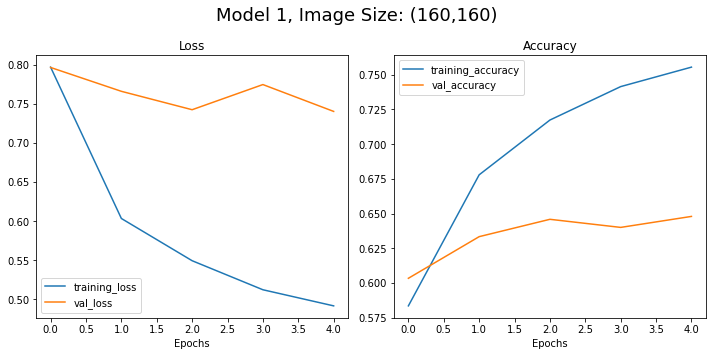

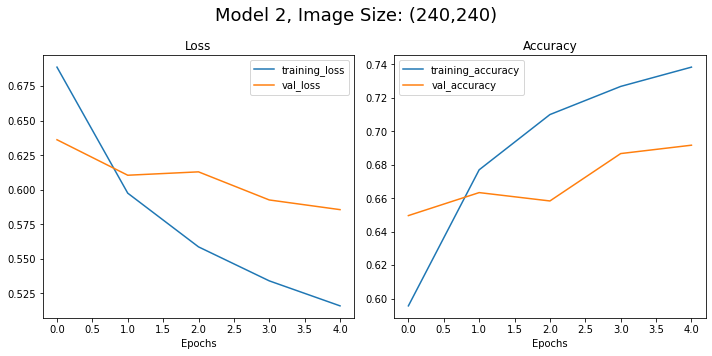

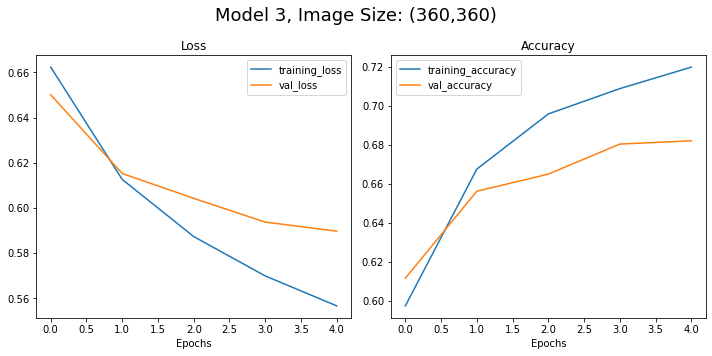

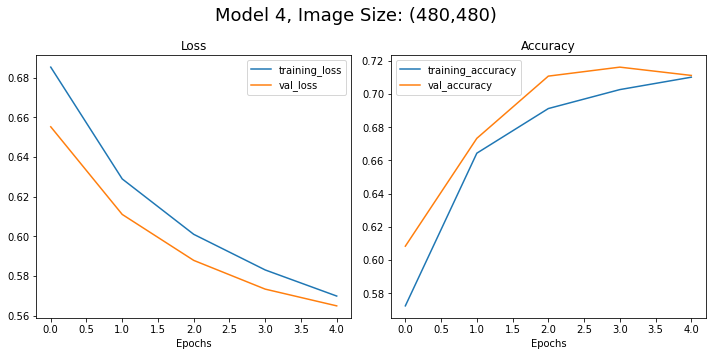

In [71]:
histories = [history_1,history_2,history_3,history_4]
titles = ["Model 1, Image Size: (160,160)", "Model 2, Image Size: (240,240)", "Model 3, Image Size: (360,360)", "Model 4, Image Size: (480,480)"]
ut.Visualize.plot_loss_curves(histories, titles, (10,5))

### We can tell that loss/accuracy metrics get better with bigger images
Training time/performance gets worse exponentially though. We'll try once more with default image size for InceptionV3 (299x299) and also set some callbacks


In [73]:
train_data_299 = train_datagen.flow_from_directory(directory=train_dir_RWF_small,
                                                                            target_size=(299,299),
                                                                            class_mode="binary", 
                                                                            batch_size=32) 
test_data_299 = valid_datagen.flow_from_directory(directory=val_dir_RWF_small,
                                                                           target_size=(299,299),
                                                                           class_mode="binary")

base_model_5 = tf.keras.applications.InceptionV3(include_top= False, weights= 'imagenet', input_shape=(299,299,3))
base_model_5.trainable = False
pool = GlobalAveragePooling2D()(base_model_5.output)
output = Dense(2, activation = 'softmax')(pool)
model_5 = Model(inputs = base_model_5.input, outputs= output)
model_5.compile(loss='sparse_categorical_crossentropy', optimizer= optimizers.SGD(lr = LR, momentum= MOMENTUM),metrics=['accuracy'])

Found 9627 images belonging to 2 classes.
Found 2400 images belonging to 2 classes.


c:\Users\tdiam\miniconda3\envs\tf2.4\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [75]:
import callbacks as cb
timetaken = cb.timecallback()
callbacks = [cb.Callbacks.checkpoint_callback(),timetaken]

Epoch 1/5
301/301 [==============================] - ETA: 0s - loss: 0.6700 - accuracy: 0.5970
Epoch 1: saving model to Checkpoints\checkpoint.ckpt
301/301 [==============================] - 85s 283ms/step - loss: 0.6700 - accuracy: 0.5970 - val_loss: 0.6166 - val_accuracy: 0.6712
Epoch 2/5
301/301 [==============================] - ETA: 0s - loss: 0.6062 - accuracy: 0.6738
Epoch 2: saving model to Checkpoints\checkpoint.ckpt
301/301 [==============================] - 83s 276ms/step - loss: 0.6062 - accuracy: 0.6738 - val_loss: 0.5859 - val_accuracy: 0.6946
Epoch 3/5
301/301 [==============================] - ETA: 0s - loss: 0.5735 - accuracy: 0.6990
Epoch 3: saving model to Checkpoints\checkpoint.ckpt
301/301 [==============================] - 98s 325ms/step - loss: 0.5735 - accuracy: 0.6990 - val_loss: 0.5816 - val_accuracy: 0.6858
Epoch 4/5
301/301 [==============================] - ETA: 0s - loss: 0.5521 - accuracy: 0.7159
Epoch 4: saving model to Checkpoints\checkpoint.ckpt
301/30

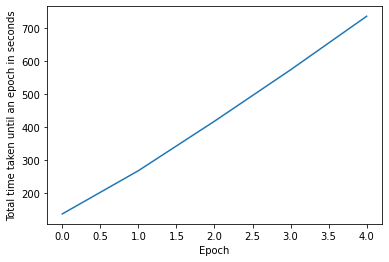

Epoch  0  run time is:  137.125
Epoch  1  run time is:  131.1875
Epoch  2  run time is:  150.09375
Epoch  3  run time is:  155.9375
Epoch  4  run time is:  162.59375
Total trained time is:  736.9375


In [77]:
history_5 = model_5.fit(train_data_299,epochs=EPOCHS,callbacks=callbacks,validation_data=test_data_299,verbose=1)

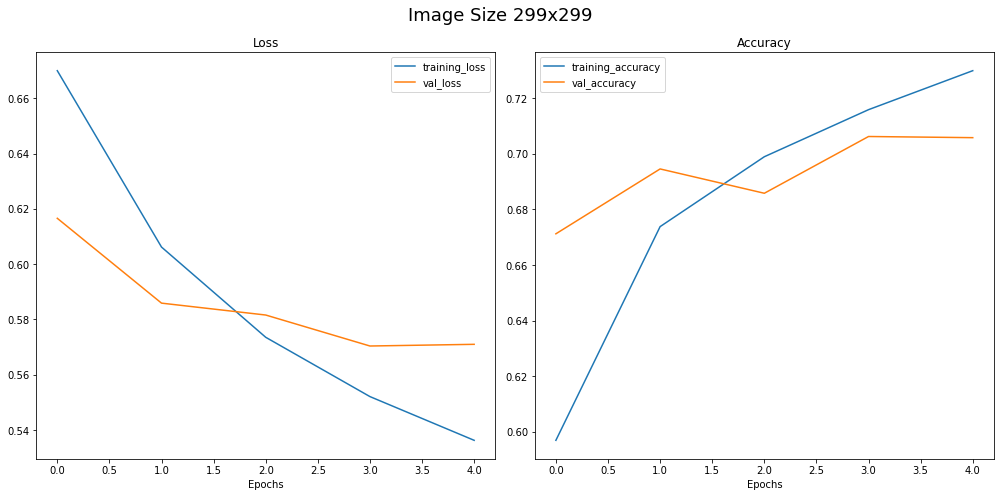

In [78]:
ut.Visualize.plot_loss_curves([history_5],["Image Size 299x299"])

### We see good compromise between training time and accuracy
However the network is...
We'll see with a bigger dataset

In [79]:
train_dir_RWF_big = 'RWF-2000 Dataframe/train'
val_dir_RWF_big = 'RWF-2000 Dataframe/val'
train_data_big_299 = train_datagen.flow_from_directory(directory=train_dir_RWF_big,
                                                                            target_size=(299,299),
                                                                            class_mode="binary", 
                                                                            batch_size=32) 
test_data_big_299 = valid_datagen.flow_from_directory(directory=val_dir_RWF_big,
                                                                           target_size=(299,299),
                                                                           class_mode="binary")

base_model_6 = tf.keras.applications.InceptionV3(include_top= False, weights= 'imagenet', input_shape=(299,299,3))
base_model_6.trainable = False
pool = GlobalAveragePooling2D()(base_model_6.output)
output = Dense(2, activation = 'softmax')(pool)
model_6 = Model(inputs = base_model_6.input, outputs= output)
model_6.compile(loss='sparse_categorical_crossentropy', optimizer= optimizers.SGD(lr = LR, momentum= MOMENTUM),metrics=['accuracy'])

Found 79997 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


c:\Users\tdiam\miniconda3\envs\tf2.4\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
2500/2500 [==============================] - ETA: 0s - loss: 0.5582 - accuracy: 0.7120
Epoch 1: saving model to Checkpoints\checkpoint.ckpt
2500/2500 [==============================] - 970s 387ms/step - loss: 0.5582 - accuracy: 0.7120 - val_loss: 0.5800 - val_accuracy: 0.7051
Epoch 2/5
2500/2500 [==============================] - ETA: 0s - loss: 0.4697 - accuracy: 0.7779
Epoch 2: saving model to Checkpoints\checkpoint.ckpt
2500/2500 [==============================] - 1144s 457ms/step - loss: 0.4697 - accuracy: 0.7779 - val_loss: 0.5814 - val_accuracy: 0.7099
Epoch 3/5
2500/2500 [==============================] - ETA: 0s - loss: 0.4376 - accuracy: 0.7985
Epoch 3: saving model to Checkpoints\checkpoint.ckpt
2500/2500 [==============================] - 1272s 509ms/step - loss: 0.4376 - accuracy: 0.7985 - val_loss: 0.5822 - val_accuracy: 0.7156
Epoch 4/5
2500/2500 [==============================] - ETA: 0s - loss: 0.4169 - accuracy: 0.8113
Epoch 4: saving model to Checkpoints\che

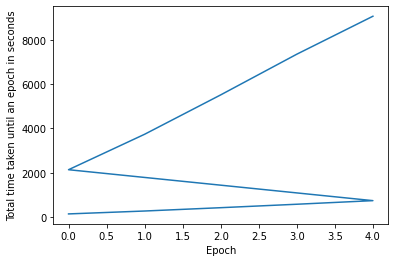

Epoch  0  run time is:  137.125
Epoch  1  run time is:  131.1875
Epoch  2  run time is:  150.09375
Epoch  3  run time is:  155.9375
Epoch  4  run time is:  162.59375
Epoch  0  run time is:  1397.75
Epoch  1  run time is:  1602.140625
Epoch  2  run time is:  1779.5
Epoch  3  run time is:  1838.375
Epoch  4  run time is:  1714.59375
Total trained time is:  9069.296875


In [80]:
history_6 = model_6.fit(train_data_big_299,epochs=EPOCHS,callbacks=callbacks,validation_data=test_data_big_299,verbose=1)

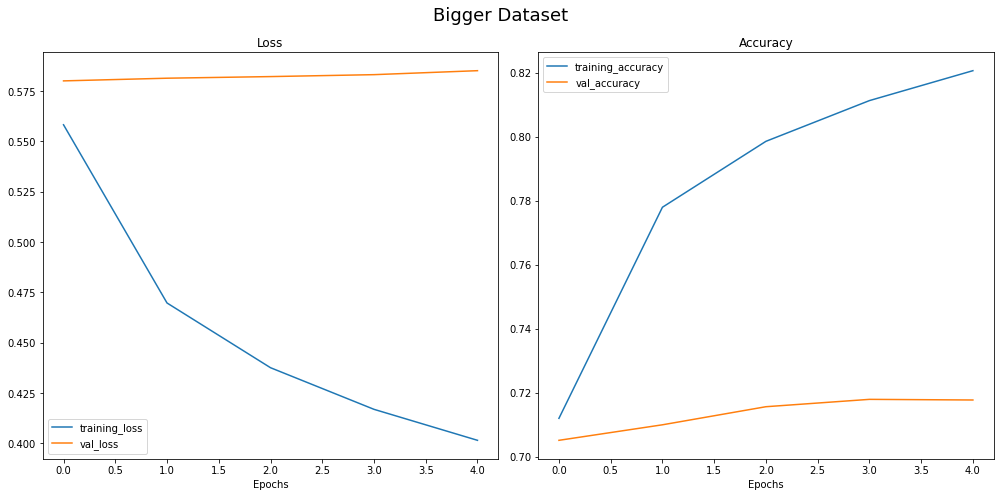

In [81]:
ut.Visualize.plot_loss_curves([history_6],["Bigger Dataset"])